In [25]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Import the time module.
import time

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [16]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [19]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | hilo
Processing Record 2 of Set 13 | new norfolk
Processing Record 3 of Set 13 | la ronge
Processing Record 4 of Set 13 | ushuaia
Processing Record 5 of Set 13 | krasnotorka
Processing Record 6 of Set 13 | rochegda
Processing Record 7 of Set 13 | ponta do sol
Processing Record 8 of Set 13 | faanui
Processing Record 9 of Set 13 | puksoozero
Processing Record 10 of Set 13 | havoysund
Processing Record 11 of Set 13 | avarua
Processing Record 12 of Set 13 | port alfred
Processing Record 13 of Set 13 | bluff
Processing Record 14 of Set 13 | bhadra
Processing Record 15 of Set 13 | puerto ayora
Processing Record 16 of Set 13 | qaanaaq
Processing Record 17 of Set 13 | albany
Processing Record 18 of Set 13 | tongzi
Processing Record 19 of Set 13 | plettenberg bay
Processing Record 20 of Set 13 | sioux lookout
Processing Record 21 of Set 13 | micheweni
Processing Record 22 of Set 13 | sao filipe
Processing Record 23 of Set 13 | provideniya
Processing Record 24 of 

Processing Record 36 of Set 16 | bengkulu
Processing Record 37 of Set 16 | paamiut
Processing Record 38 of Set 16 | mtambile
Processing Record 39 of Set 16 | sitka
Processing Record 40 of Set 16 | marechal floriano
Processing Record 41 of Set 16 | beloha
Processing Record 42 of Set 16 | san juan
Processing Record 43 of Set 16 | amapa
Processing Record 44 of Set 16 | mayumba
Processing Record 45 of Set 16 | esperance
Processing Record 46 of Set 16 | touros
Processing Record 47 of Set 16 | nanortalik
Processing Record 48 of Set 16 | kasungu
Processing Record 49 of Set 16 | olinda
Processing Record 50 of Set 16 | saint george
Processing Record 1 of Set 17 | pevek
Processing Record 2 of Set 17 | kiruna
Processing Record 3 of Set 17 | vestmannaeyjar
Processing Record 4 of Set 17 | teya
Processing Record 5 of Set 17 | domoni
Processing Record 6 of Set 17 | lasa
Processing Record 7 of Set 17 | kibre mengist
Processing Record 8 of Set 17 | erzin
Processing Record 9 of Set 17 | airai
Processing

Processing Record 25 of Set 20 | treinta y tres
Processing Record 26 of Set 20 | paramonga
Processing Record 27 of Set 20 | bandrele
Processing Record 28 of Set 20 | sakakah
Processing Record 29 of Set 20 | majene
Processing Record 30 of Set 20 | gvarv
Processing Record 31 of Set 20 | north bend
Processing Record 32 of Set 20 | la baule-escoublac
Processing Record 33 of Set 20 | storm lake
Processing Record 34 of Set 20 | salinas
Processing Record 35 of Set 20 | baykit
Processing Record 36 of Set 20 | poya
Processing Record 37 of Set 20 | tynda
Processing Record 38 of Set 20 | karakol
Processing Record 39 of Set 20 | san luis
Processing Record 40 of Set 20 | high level
Processing Record 41 of Set 20 | tuatapere
Processing Record 42 of Set 20 | san joaquin
Processing Record 43 of Set 20 | jangipur
Processing Record 44 of Set 20 | arlit
Processing Record 45 of Set 20 | ornskoldsvik
Processing Record 46 of Set 20 | paita
Processing Record 47 of Set 20 | fethiye
Processing Record 48 of Set

Processing Record 5 of Set 24 | ciudad bolivar
Processing Record 6 of Set 24 | kizema
Processing Record 7 of Set 24 | tautira
Processing Record 8 of Set 24 | kasongo-lunda
Processing Record 9 of Set 24 | zakopane
Processing Record 10 of Set 24 | zhengjiatun
Processing Record 11 of Set 24 | asilah
Processing Record 12 of Set 24 | moroni
Processing Record 13 of Set 24 | carmen
Processing Record 14 of Set 24 | halalo
City not found. Skipping...
Processing Record 15 of Set 24 | bolungarvik
City not found. Skipping...
Processing Record 16 of Set 24 | pedernales
Processing Record 17 of Set 24 | forecariah
Processing Record 18 of Set 24 | saint-pierre
Processing Record 19 of Set 24 | narasannapeta
Processing Record 20 of Set 24 | jardim
Processing Record 21 of Set 24 | balikpapan
Processing Record 22 of Set 24 | tateyama
Processing Record 23 of Set 24 | juneau
Processing Record 24 of Set 24 | yunyang
Processing Record 25 of Set 24 | jewar
Processing Record 26 of Set 24 | rosamorada
Processing

In [21]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hilo,US,2020-08-19 01:32:22,19.73,-155.09,82.40,61,90,4.70
1,New Norfolk,AU,2020-08-19 01:32:23,-42.78,147.06,54.00,77,23,4.00
2,La Ronge,CA,2020-08-19 01:32:23,55.10,-105.28,73.40,73,20,8.05
3,Ushuaia,AR,2020-08-19 01:30:51,-54.80,-68.30,32.00,90,40,13.87
4,Krasnotorka,UA,2020-08-19 01:32:24,48.68,37.53,66.78,60,4,3.56
5,Rochegda,RU,2020-08-19 01:32:24,62.80,43.25,37.83,95,0,4.81
6,Ponta Do Sol,PT,2020-08-19 01:32:25,32.67,-17.10,69.80,83,20,5.82
7,Faanui,PF,2020-08-19 01:32:25,-16.48,-151.75,77.77,77,0,19.35
8,Puksoozero,RU,2020-08-19 01:32:26,62.59,40.61,36.32,96,0,3.29
9,Havoysund,NO,2020-08-19 01:32:26,71.00,24.66,48.20,100,100,9.17


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [27]:
# Get today's date in seconds.
today = time.strftime("%x")
today

'08/18/20'

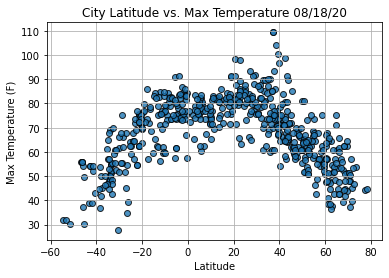

In [28]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()